# **Trabalho Final - ICA**

## **Base de Dados**

In [ ]:
#Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# Carregamos o dataset escolhido

dataset = pd.read_csv("/content/drive/MyDrive/dataset/fetal_health.csv")
dataset

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


## **Análise Exploratória**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
dataset.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [ ]:
dataset.shape

(2126, 22)

In [ ]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2121    False
2122    False
2123    False
2124    False
2125    False
Length: 2126, dtype: bool

In [ ]:
dataset.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

## **Pré-Processamento  e Transformação dos Dados**

### Verificando distribuição das classes

In [ ]:
# qtd de cada classe
dataset.fetal_health.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


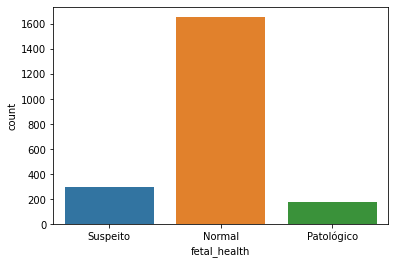

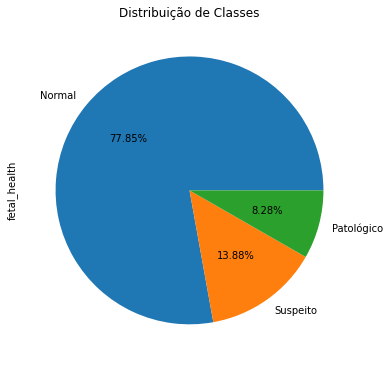

In [ ]:
#Histograma
df=pd.DataFrame(dataset['fetal_health'].replace(1.0,'Normal').replace(2.0,'Suspeito').replace(3.0,'Patológico'))
sns.countplot('fetal_health', data=df)

#Gráfico Pizza
df  = pd.DataFrame(dataset['fetal_health'].replace(1.0,'Normal').replace(2.0,'Suspeito').replace(3.0,'Patológico').value_counts())
df.plot(kind='pie', title='Distribuição de Classes',y = 'fetal_health', 
          autopct='%1.2f%%', shadow=False, legend = False, fontsize=10, figsize=(6,8))

### **Balanceando Classes**

**NearMiss**

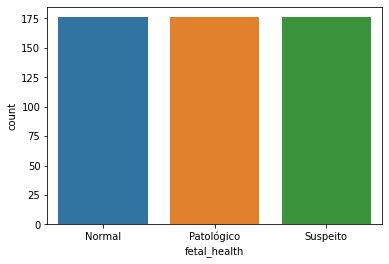

In [ ]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()


output_df = pd.DataFrame(dataset, columns = dataset.columns)
X, y = nr.fit_resample(output_df, dataset['fetal_health'].replace(1.0,'Normal').replace(2.0,'Suspeito').replace(3.0,'Patológico'))
ax = sns.countplot(x=y)
#y.value_counts()

**SMOTE ( Synthetic Minority Over-sampling )**

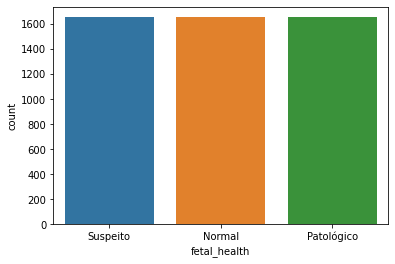

In [ ]:

#from imblearn.over_sampling import SMOTE

#output_df = pd.DataFrame(dataset, columns = dataset.columns)

#sm = SMOTE()
#X, y = sm.fit_resample(output_df, dataset['fetal_health'].replace(1.0,'Normal').replace(2.0,'Suspeito').replace(3.0,'Patológico'))
#ax= sns.countplot(x=y)
#y.value_counts()

In [ ]:
y.value_counts()

Normal        176
Patológico    176
Suspeito      176
Name: fetal_health, dtype: int64

Criamos rótulos e recursos com colunas de destino que são a saúde fetal

In [ ]:
X = dataset.drop(["fetal_health"],axis=1)
y = dataset["fetal_health"]


### Normalizando Valores

Minimizando as diferenças de intervalo das variáveis 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
s = StandardScaler()
m = MinMaxScaler ()
X = m.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.259259,0.000000,0.0,0.000000,0.0,0.0,0.0,0.813333,0.044118,0.472527,0.047337,0.344633,0.110092,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,1.0
1,0.481481,0.315789,0.0,0.400000,0.2,0.0,0.0,0.066667,0.279412,0.000000,0.205128,0.717514,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0.5
2,0.500000,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.279412,0.000000,0.264300,0.717514,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0.5
3,0.518519,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.323529,0.000000,0.453649,0.644068,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,1.0
4,0.481481,0.368421,0.0,0.533333,0.0,0.0,0.0,0.053333,0.323529,0.000000,0.392505,0.644068,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,1.0


## **Aplicando Modelos**

https://www.kaggle.com/nevzatbugrahanturk/multi-class-classification

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = True, random_state= 42)

### **KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9154135338345865


In [ ]:
from sklearn.model_selection import GridSearchCV

param = {'n_neighbors': [3,5,7,9,11,13,15,21],
               'weights': ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, param, cv=10)
knn_gs_res = knn_gs.fit(X_train, y_train)
best_params = knn_gs_res.best_params_

print("Best score: ", knn_gs_res.best_score_)
#print("Score: ", knn_gs_res.grid_scores_)
print("Best parameters: ",best_params)


Best score:  0.9159591194968553
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [ ]:
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)

y_hat = knn.predict(X_train)
y_pred_knn = knn.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# confusion matrix and classification report
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       413
         2.0       0.78      0.73      0.75        82
         3.0       0.83      0.81      0.82        37

    accuracy                           0.92       532
   macro avg       0.85      0.84      0.85       532
weighted avg       0.92      0.92      0.92       532



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


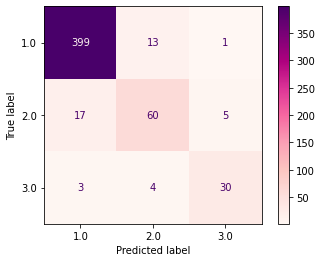

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(knn, X_test, y_test,cmap="RdPu")
plt.show()

### **Random Forest**

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9454887218045113


In [ ]:
from sklearn.model_selection import GridSearchCV

params_dt = {
    #"random_state" : [10, 15, 17],
    "criterion":("gini", "entropy"),  
    "max_depth":(list(range(1, 20))), 
    #"min_samples_leaf":[2, 3, 4],
    "max_features" : ("auto", "sqrt", "log2")
}

rfc = RandomForestClassifier(random_state=10)
rfc  = GridSearchCV(rfc, params_dt, cv=10, scoring="accuracy")
rfc.fit(X_train, y_train)
best_params_rfc = rfc.best_params_
best_score_rfc = rfc.best_score_

print(f"Best score: {best_score_rfc}")
print(f"Best paramters: {best_params_rfc}")


Best score: 0.9404284591194969
Best paramters: {'criterion': 'gini', 'max_depth': 13, 'max_features': 'auto'}


In [ ]:
rfc = RandomForestClassifier(**best_params_rfc)
rfc.fit(X_train, y_train)

y_hat = rfc.predict(X_train)
y_pred = rfc.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[406   5   2]
 [ 15  64   3]
 [  2   1  34]]
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       413
         2.0       0.91      0.78      0.84        82
         3.0       0.87      0.92      0.89        37

    accuracy                           0.95       532
   macro avg       0.92      0.89      0.90       532
weighted avg       0.95      0.95      0.95       532



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


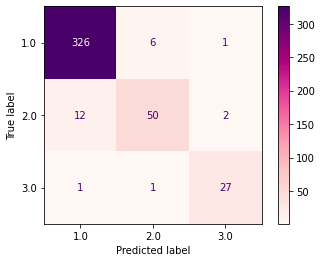

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(rfc, X_test, y_test,cmap="RdPu")
plt.show()

### **Regressão Logística**

In [ ]:
rlog = LogisticRegression()
rlog.fit(X_train, y_train)
y_pred = rlog.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8943661971830986


In [ ]:
params ={'C':[0.001,0.01,0.1,1,10,1000,100],
      "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}


rlog = LogisticRegression(penalty = "l2", dual= False, max_iter = 100000)
rlog  = GridSearchCV(rlog,params, cv=10, scoring="accuracy")
rlog.fit(X_train, y_train)
best_params = rlog.best_params_
best_score= rlog.best_score_

print(f"Best score: {best_score}")
print(f"Best paramters: {best_params}")

Best score: 0.9002594339622642
Best paramters: {'C': 1000, 'solver': 'liblinear'}


In [ ]:
rlog = LogisticRegression(**best_params)
rlog.fit(X_train, y_train)

y_hat = rlog.predict(X_train)
y_pred_rl = rlog.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_rl))
print(classification_report(y_test, y_pred_rl))


[[391  20   2]
 [ 21  52   9]
 [  3   4  30]]
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       413
         2.0       0.68      0.63      0.66        82
         3.0       0.73      0.81      0.77        37

    accuracy                           0.89       532
   macro avg       0.79      0.80      0.79       532
weighted avg       0.89      0.89      0.89       532



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


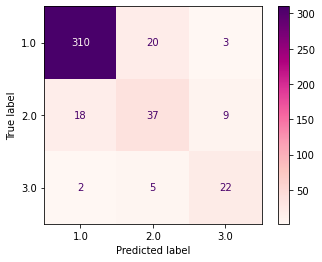

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(rlog, X_test, y_test,cmap="RdPu")
plt.show()

### **MLP**

In [ ]:
mlp= MLPClassifier(
    hidden_layer_sizes=(5000,),
    activation = 'relu',
    max_iter=100,
    #alpha=1e-4,
    solver="sgd",
    #verbose=10,
    random_state=1,
    learning_rate_init=0.3,
).fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
ac = (metrics.accuracy_score(y_test, y_pred_mlp))
print(ac)

0.9248826291079812


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

         1.0       0.97      0.94      0.95       413
         2.0       0.71      0.73      0.72        82
         3.0       0.76      0.92      0.83        37

    accuracy                           0.91       532
   macro avg       0.81      0.86      0.84       532
weighted avg       0.91      0.91      0.91       532



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


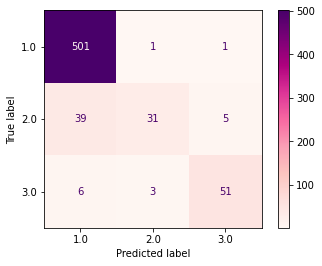

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(mlp, X_test, y_test,cmap="RdPu")
plt.show()

### **XGBoost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

xb = GradientBoostingClassifier(learning_rate = 1.0, loss = 'deviance', max_depth = 8, n_estimators =300)
xb.fit(X_train, y_train)
y_pred = xb.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9507042253521126


In [ ]:
params_xb ={'n_estimators':[200,250,300], 
#            'learning_rate':[1.0,2.0,3.0],
           'max_depth':(list(range(1, 10))),
            'loss':['deviance','exponential']}


xb = GradientBoostingClassifier(learning_rate = 1.0)
xb  = GridSearchCV(xb,params_xb, cv=10, scoring="accuracy")
xb.fit(X_train, y_train)
best_params_xb = xb.best_params_
best_score_xb= xb.best_score_

print(f"Best score: {best_score_xb}")
print(f"Best paramters: {best_params_xb}")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 310, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/

Best score: 0.9447058823529412
Best paramters: {'loss': 'deviance', 'max_depth': 4, 'n_estimators': 250}
